In [139]:
import json
import urllib2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = "https://nycdatastables.s3.amazonaws.com/2013-08-19T18:18:28.877Z/nyc-zip-code-tabulation-areas-polygons.geojson"
request = urllib2.urlopen(url)
nyc = json.load(request)

In [140]:
zipcode = []
for department in nyc['features']:
    zipcode.append(str(department['properties']["postalCode"]))

In [142]:
import os
path = os.getcwd()
path
os.chdir(path)

In [143]:
import zipfile
tr0 = range(1994,2014)
tr1 = range(1998,2003)
ffname = "zbp{0}totals.zip"
bizzip = set()
for i in tr0:
    #the columns in tr1 are written in upper case, we need to replace them with lower case
    if i in tr1:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    newzip = set(df.zip).intersection(set(zipcode))
    bizzip = bizzip.union(newzip)

In [144]:
biz_zip = sorted(bizzip)
biz_data_est = pd.DataFrame(np.nan,index=biz_zip,columns=tr0)

In [145]:
for i in tr0:
    if i in tr1:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    for j in biz_zip:
        if j in list(set(df.zip)):
            biz = df[df.zip==j]
            biz_data_est.loc[j][i]=int(biz.est)

In [146]:
biz_data_est = biz_data_est.dropna()
biz_zip = biz_data_est.index

In [147]:
biz_data_est.to_csv('output.csv',index_label='zip')

In [148]:
mydata = pd.read_csv('output.csv',index_col='zip')

In [149]:
mydata

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
zip,,,,,,,,,,,,,,,,,,,,
10001,6999,7088,7075,7154,7254,7233,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,7273
10002,1784,1819,1919,2049,2003,2085,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,2988
10003,3256,3377,3417,3535,3649,3659,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,4277
10004,1115,1124,1133,1173,1176,1233,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,1479
10005,1076,1109,1216,1227,1270,1242,1287,1249,1244,1200,1226,1214,1259,1273,1291,1274,1266,1301,1273,1296
10006,1061,1002,969,990,1030,1059,1067,1026,934,862,869,870,874,863,845,828,843,834,850,852
10007,1307,1274,1254,1287,1282,1303,1327,1233,1620,1603,1635,1311,1292,1284,1313,1277,1330,1368,1400,1424
10009,634,633,673,747,786,804,860,869,921,953,982,1029,1016,1027,1066,1049,1090,1128,1176,1220
10010,3019,2987,3029,3112,3152,3143,3203,3178,3085,3045,3059,3060,3047,2948,3000,2938,2981,3022,3068,3091


In [150]:
for i in range(len(mydata)):
    mydata.iloc[i] = (mydata.iloc[i]-np.mean(mydata.iloc[i]))/np.std(mydata.iloc[i])

###K-means Clustering

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

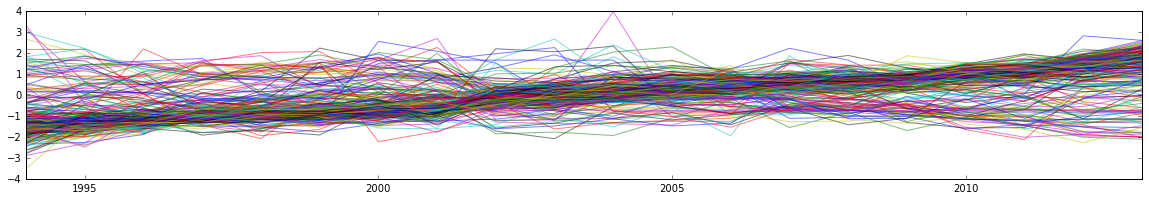

In [152]:
plt.figure(figsize=(20,3))
plt.xlim(1994,2013)
for i in range(len(data)):
    plt.plot(mydata.iloc[i],alpha=0.5)

In [161]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

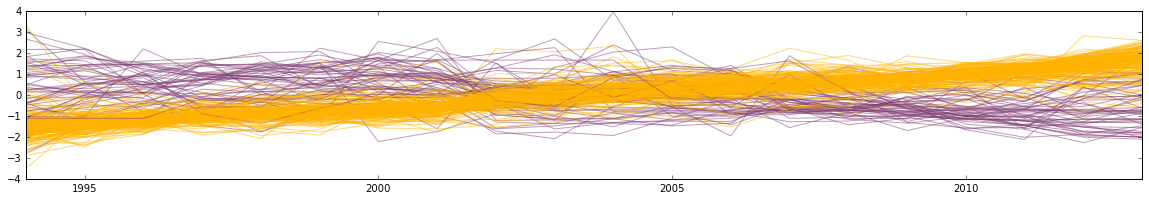

In [168]:
est=KMeans(n_clusters=2,n_init=100)
est.fit(mydata)
labels2=est.labels_

plt.figure(figsize=(20,3))
plt.xlim(1994,2013)
for i in range(len(mydata)):
    plt.plot(mydata.iloc[i],c=kelly_colors_hex[labels2[i]],alpha=0.5)

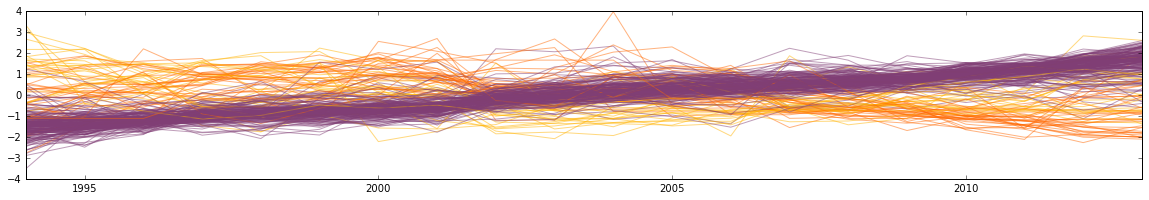

In [169]:
est=KMeans(n_clusters=3,n_init=100)
est.fit(mydata)
labels3=est.labels_

plt.figure(figsize=(20,3))
plt.xlim(1994,2013)
for i in range(len(mydata)):
    plt.plot(mydata.iloc[i],c=kelly_colors_hex[labels3[i]],alpha=0.5)

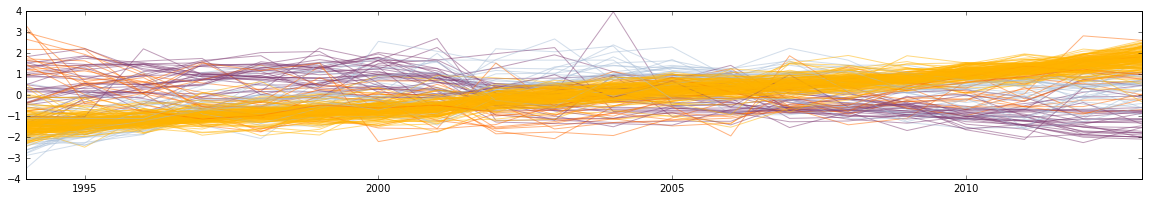

In [171]:
est=KMeans(n_clusters=4,n_init=100)
est.fit(mydata)
labels4=est.labels_

plt.figure(figsize=(20,3))
plt.xlim(1994,2013)
for i in range(len(mydata)):
    plt.plot(mydata.iloc[i],c=kelly_colors_hex[labels4[i]],alpha=0.5)

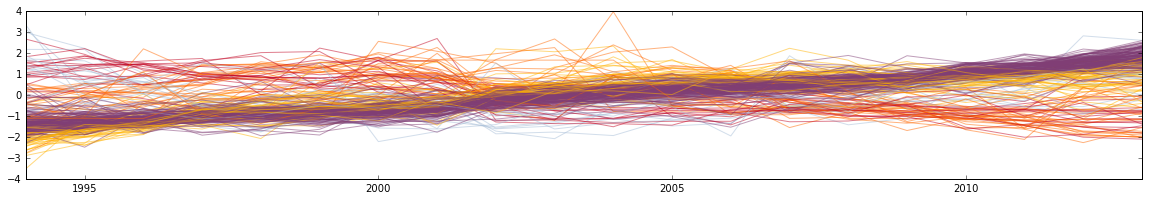

In [199]:
est=KMeans(n_clusters=5,n_init=100)
est.fit(mydata)
labels5=est.labels_

plt.figure(figsize=(20,3))
plt.xlim(1994,2013)
for i in range(len(mydata)):
    plt.plot(mydata.iloc[i],c=kelly_colors_hex[labels5[i]],alpha=0.5)

###Plot centroids

In [200]:
#Take 5 clusters as an example
labels5

array([0, 1, 1, 1, 0, 4, 0, 1, 2, 0, 0, 4, 0, 2, 4, 1, 2, 0, 2, 2, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 3,
       3, 4, 4, 4, 2, 0, 1, 2, 0, 3, 4, 4, 2, 0, 4, 2, 3, 3, 3, 3, 2, 2, 2,
       1, 3, 4, 2, 1, 4, 4, 1, 2, 4, 3, 4, 4, 2, 0, 2, 0, 4, 0, 4, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 3, 3, 1, 0, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0], dtype=int32)

In [249]:
# Use weighted average to calculate the cluster centers

wtmp = np.zeros((5, len(mydata)))
for i in range(len(mydata)):wtmp[labels[i]][i] = 1
clmeans = [np.average(mydata, axis=0, weights=(wtmp[i])) for i in range(5)]

In [250]:
clmeans = pd.DataFrame(clmeans)

In [251]:
clmeans.columns = ['1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']

In [252]:
clmeans

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,-0.966788,-0.731964,-0.350805,-0.095481,0.117015,0.102770,0.795095,0.847901,0.791915,0.907883,1.073110,0.473511,0.185778,-0.165622,-0.458281,-0.611694,-0.683695,-0.836160,-0.301581,-0.092906
1,-2.011276,-1.650696,-1.310181,-0.874950,-0.693276,-0.439991,-0.313299,-0.325939,0.024370,0.238696,0.543518,0.666329,0.719834,0.786709,0.764148,0.703360,0.746818,0.806250,0.718913,0.900663
2,1.524144,0.917219,0.287648,-0.192176,-0.487799,-0.029833,-0.483353,-0.554605,-0.843478,-0.981092,-0.498064,-0.278970,-0.312987,-0.060210,-0.128672,0.038387,0.128272,0.321579,0.772743,0.861247
3,0.355034,0.763270,0.786913,0.940112,1.044060,1.143784,1.120496,0.762481,-0.131644,-0.283366,-0.145185,-0.190863,-0.142603,-0.445129,-0.547280,-0.686867,-0.883919,-1.079404,-1.173322,-1.206570
4,-1.330111,-1.261335,-1.156311,-1.008177,-0.894482,-0.868667,-0.734889,-0.624611,-0.225504,-0.074634,0.102895,0.245058,0.283866,0.497415,0.630458,0.769352,1.058036,1.251196,1.523762,1.816682


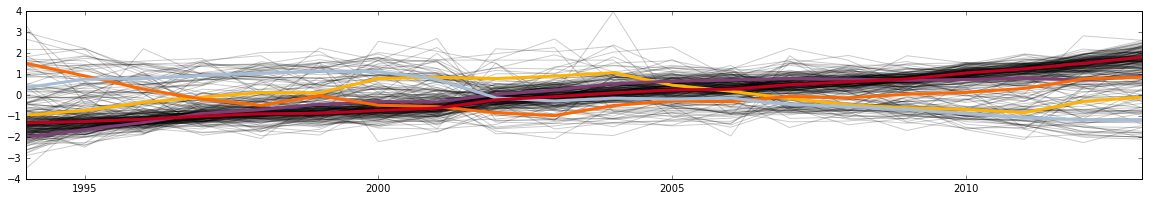

In [253]:
# Visualization of the cluster centers

plt.figure(figsize=(20,3))
plt.xlim(1994,2013)
for i in range(len(mydata)):
    plt.plot(mydata.iloc[i],c='black',alpha=0.2)
for ii in range(5):
    plt.plot(clmeans.iloc[ii],c=kelly_colors_hex[ii],linewidth=3)

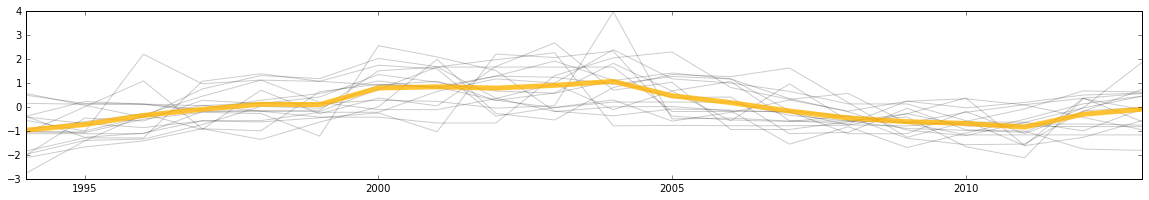

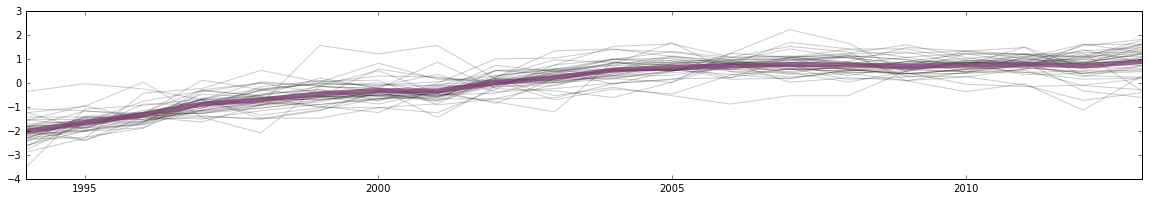

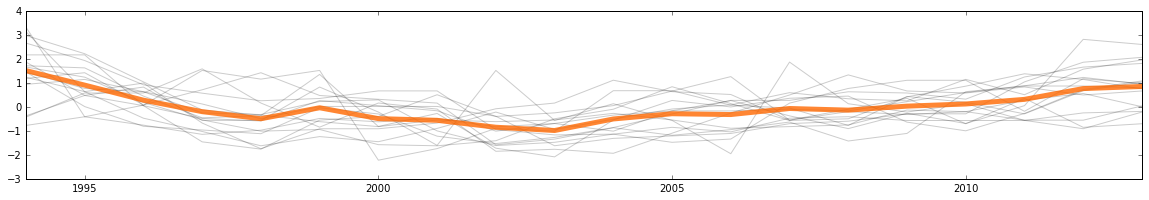

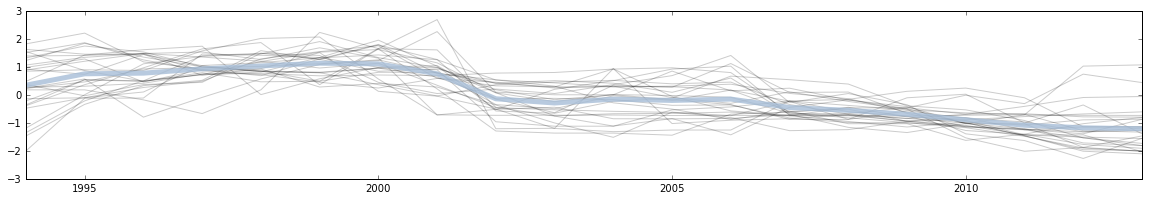

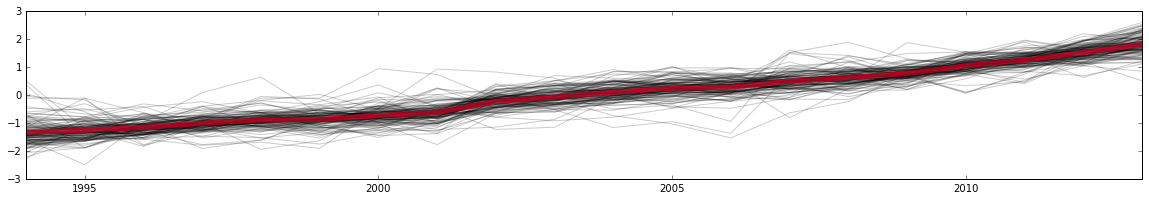

In [254]:
# Visualization of each cluster center
for i in range(5):
    plt.figure(figsize=(20,3))
    plt.xlim(1994,2013)
    for j in range(len(mydata)):
        if labels[j] == i:
            plt.plot(mydata.iloc[j],c='black',alpha=0.2)
    plt.plot(clmeans.iloc[i],c=kelly_colors_hex[i],linewidth=5,alpha=0.8)

###Hierarchical clustering

In [263]:
from sklearn.cluster import AgglomerativeClustering
est=AgglomerativeClustering(n_clusters=5)
est.fit(mydata)
hclabels=est.labels_

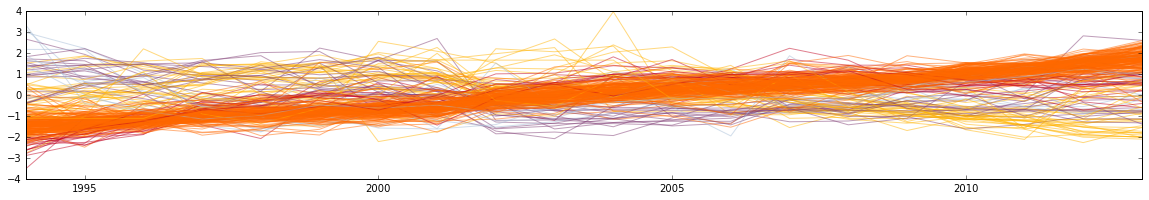

In [264]:
plt.figure(figsize=(20,3))
plt.xlim(1994,2013)
for i in range(len(mydata)):
    plt.plot(mydata.iloc[i],c=kelly_colors_hex[hclabels[i]],alpha=0.5)

In [277]:
hclabels

array([4, 2, 2, 2, 4, 1, 0, 2, 0, 2, 4, 1, 4, 0, 0, 2, 0, 4, 0, 0, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 3,
       3, 1, 1, 0, 0, 4, 2, 0, 2, 1, 1, 0, 0, 4, 1, 0, 1, 1, 1, 3, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 4, 1, 4, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 4, 2, 2, 2, 0, 3, 2, 4, 2, 2, 3, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2])

In [278]:
wtmp = np.zeros((5, len(mydata)))
for i in range(len(mydata)):wtmp[hclabels[i]][i] = 1
hcclmeans = [np.average(mydata, axis=0, weights=(wtmp[i])) for i in range(5)]

In [279]:
hcclmeans = pd.DataFrame(hcclmeans)
hcclmeans.columns = ['1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']

In [280]:
hcclmeans

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,-0.469804,-0.084282,0.182228,0.438173,0.563880,0.551028,0.781595,0.723745,0.420263,0.460593,0.684058,0.400065,0.255401,-0.182817,-0.411287,-0.649502,-0.843206,-1.060116,-0.958966,-0.801050
1,0.963494,1.127599,0.763432,0.692793,0.657002,0.845127,0.763304,0.329801,-0.826994,-1.047395,-0.914899,-0.818401,-0.759719,-0.426566,-0.448084,-0.423711,-0.395469,-0.332722,0.144986,0.106422
2,-1.409398,-1.316853,-1.192654,-1.012025,-0.888141,-0.827876,-0.695532,-0.587180,-0.191915,-0.027319,0.155025,0.286690,0.334273,0.520944,0.637862,0.778100,1.042994,1.213428,1.451399,1.728180
3,1.980126,0.771672,0.054134,-0.855131,-1.134413,-0.597459,-0.787176,-0.770257,-0.527084,-0.633905,-0.089127,0.118177,0.004796,0.063102,-0.016284,0.176604,0.306539,0.588412,0.623065,0.724210
4,-2.306607,-1.794614,-1.279028,-0.686964,-0.473317,-0.131321,-0.036479,-0.186404,0.118993,0.257834,0.646328,0.738754,0.779610,0.817172,0.758019,0.584086,0.546045,0.591488,0.468554,0.587853


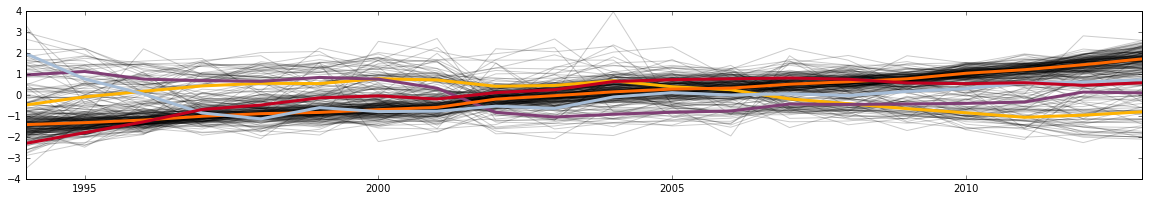

In [281]:
plt.figure(figsize=(20,3))
plt.xlim(1994,2013)
for i in range(len(mydata)):
    plt.plot(mydata.iloc[i],c='black',alpha=0.2)
for ii in range(5):
    plt.plot(hcclmeans.iloc[ii],c=kelly_colors_hex[ii],linewidth=3)

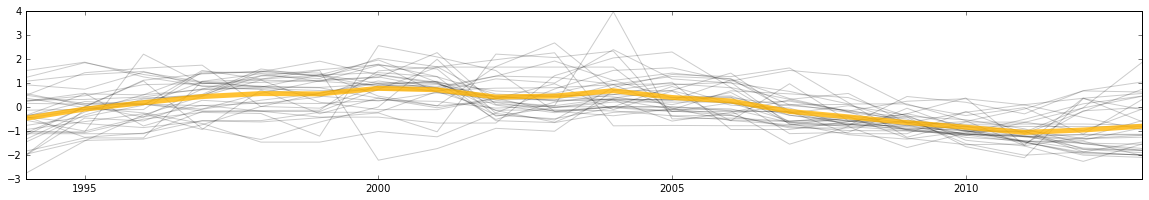

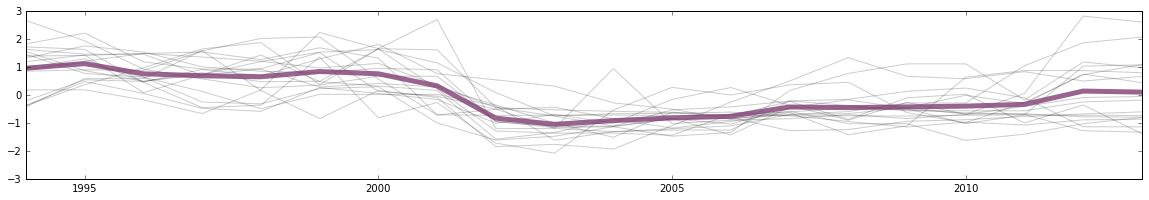

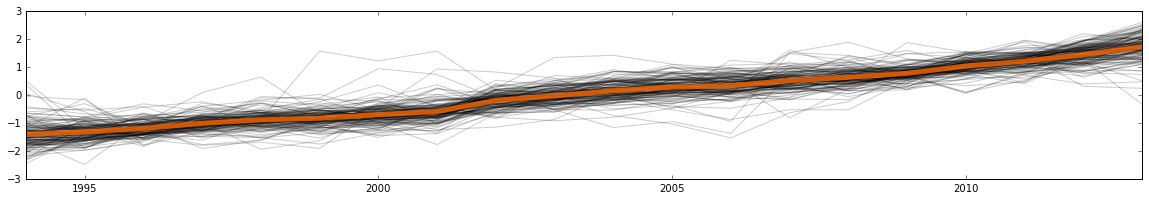

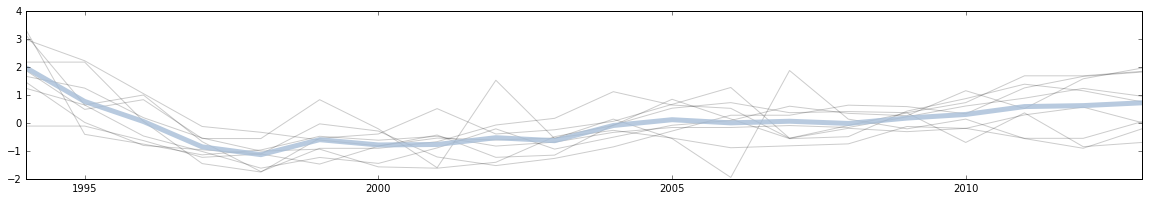

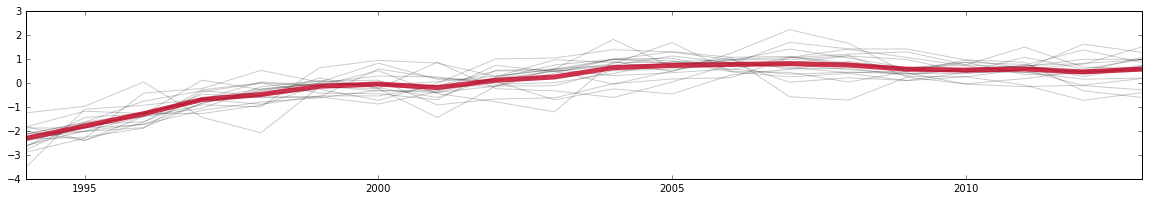

In [283]:
# Visualization of each cluster center
for i in range(5):
    plt.figure(figsize=(20,3))
    plt.xlim(1994,2013)
    for j in range(len(mydata)):
        if hclabels[j] == i:
            plt.plot(mydata.iloc[j],c='black',alpha=0.2)
    plt.plot(hcclmeans.iloc[i],c=kelly_colors_hex[i],linewidth=5,alpha=0.8)

###Overlay the data in NYC map

In [356]:
#k-means clustering
kmdata5=pd.DataFrame({'zips':biz_zip,
                       'cluster':labels5})

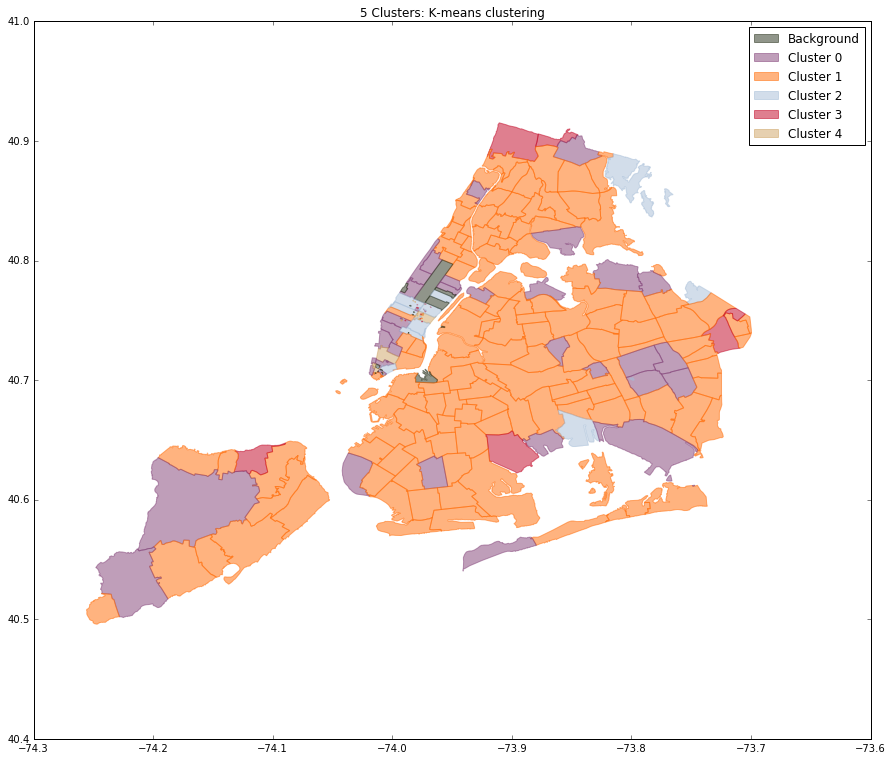

In [357]:
import matplotlib.pyplot as plt 
from descartes import PolygonPatch
fig = plt.figure(figsize=(15,15)) 
for i in nyc['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    GREEN = kelly_colors_hex[19]
    if postcode in list(set(biz_zip)):
        color = kelly_colors_hex[int(kmdata5[kmdata5['zips']==postcode]['cluster'])+1]
        ax.add_patch(PolygonPatch(poly, fc=color, ec=color, alpha=0.5, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc=GREEN, ec=GREEN, alpha=0.5, zorder=2 ))
ax.axis('scaled')
import matplotlib.patches as mpatches

ground = mpatches.Patch(color=GREEN, alpha=0.5, label='Background')
patch0 = mpatches.Patch(color=kelly_colors_hex[1], alpha=0.5, label='Cluster 0')
patch1 = mpatches.Patch(color=kelly_colors_hex[2], alpha=0.5, label='Cluster 1')
patch2 = mpatches.Patch(color=kelly_colors_hex[3], alpha=0.5, label='Cluster 2')
patch3 = mpatches.Patch(color=kelly_colors_hex[4], alpha=0.5, label='Cluster 3')
patch4 = mpatches.Patch(color=kelly_colors_hex[5], alpha=0.5, label='Cluster 4')
plt.legend(handles=[ground,patch0,patch1,patch2,patch3,patch4],loc='best')
plt.title('5 Clusters: K-means clustering')

In [354]:
#hierarchical clustering
hcdata=pd.DataFrame({'zips':biz_zip,
                       'cluster':hclabels})

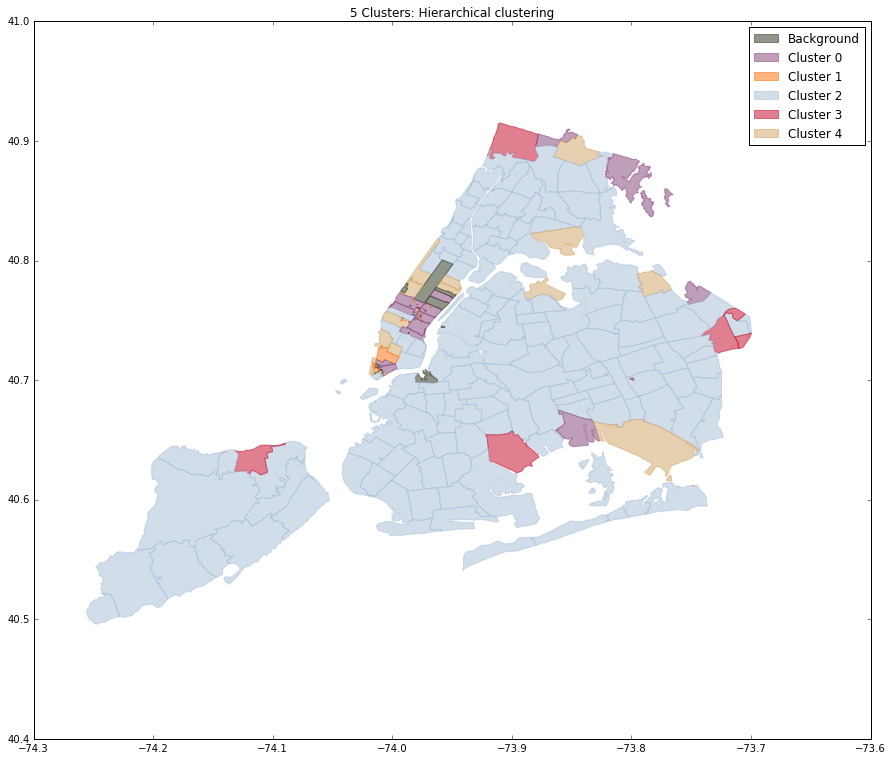

In [355]:
import matplotlib.pyplot as plt 
from descartes import PolygonPatch
fig = plt.figure(figsize=(15,15)) 
for i in nyc['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    GREEN = kelly_colors_hex[19]
    if postcode in list(set(biz_zip)):
        color = kelly_colors_hex[int(hcdata[hcdata['zips']==postcode]['cluster'])+1]
        ax.add_patch(PolygonPatch(poly, fc=color, ec=color, alpha=0.5, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc=GREEN, ec=GREEN, alpha=0.5, zorder=2 ))
ax.axis('scaled')
import matplotlib.patches as mpatches

ground = mpatches.Patch(color=GREEN, alpha=0.5, label='Background')
patch0 = mpatches.Patch(color=kelly_colors_hex[1], alpha=0.5, label='Cluster 0')
patch1 = mpatches.Patch(color=kelly_colors_hex[2], alpha=0.5, label='Cluster 1')
patch2 = mpatches.Patch(color=kelly_colors_hex[3], alpha=0.5, label='Cluster 2')
patch3 = mpatches.Patch(color=kelly_colors_hex[4], alpha=0.5, label='Cluster 3')
patch4 = mpatches.Patch(color=kelly_colors_hex[5], alpha=0.5, label='Cluster 4')
plt.legend(handles=[ground,patch0,patch1,patch2,patch3,patch4],loc='best')
plt.title('5 Clusters: Hierarchical clustering')

###Compare the results of the 2 algorithms

k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:'bottom up' and 'top down'. The results of hierarchical clustering are usually presented in a dendrogram.

However, in this problems, it is hard for us to judge which method is better because the data doesn't have an obvious structure.

###attempt an interpretation

No matter which method we use, it is clear that the time series in center of the city and the peripheral area of the city is different from the other parts. When doing research about busniess settings in the city, the two parts should be extracted.